# Execute [v1.1FirstPart...] before executing this file
# Use kernel 'second' to execute this file
# Import necessary libraries.

In [1]:
import spacy
import textacy
#import textacy.preprocessing
import textacy.resources
#import textacy.keyterms
#import textacy.ke
#import neuralcoref
from spacy.symbols import ORTH, POS, NOUN, VERB,PRON
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt 
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from networkx.readwrite import json_graph;
import json
from afinn import Afinn
afn = Afinn()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
lemmatizer = WordNetLemmatizer()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from sentistrength import PySentiStr
senti = PySentiStr()
senti.setSentiStrengthPath('D:/github/causal-graph-acquisition/SentiStrengthCom.jar')
senti.setSentiStrengthLanguageFolderPath('D:/github/causal-graph-acquisition/SentStrength_Data_Sept2011/')
import pandas as pd
from IPython.display import display
import collections
from pd_replicator import replicator

from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#model.save_pretrained(MODEL)

# from allennlp_models.pretrained import load_predictor
# predictor = load_predictor("roberta-sst")
# predictor = load_predictor("glove-sst")

# from transformers import pipeline 
# MODEL = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
# #semtiment_pipeline = pipeline("sentiment-analysis", model='cardiffnlp/twitter-roberta-base-sentiment-latest')
# semtiment_pipeline = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

from nltk.corpus import stopwords
set(stopwords.words('english'))

from nltk.stem import PorterStemmer
ps = PorterStemmer()

nlp = spacy.load("en_core_web_sm")
#neuralcoref.add_to_pipe(nlp)

# Read text file and preprocess.

In [2]:
raw_sentences = []

my_file = open("./Text/AfterNeuralcoref.txt", "r")
  
data = my_file.read()
  
raw_sentences = data.split("\n")
#print(data_into_list)
my_file.close()

print(len(raw_sentences))
print('\nNLTK Sentences:\n')
for sent in raw_sentences:
    print(sent)

21

NLTK Sentences:

enemies surround pakistan.
pakistan has faced existential threats.
zulfikar ali bhutto launched nuclear program.
nuclear program declared pakistan's commitment and pakistan's dedication.
aq khan developed nuclear bomb.
nuclear bomb strengthened pakistan.
pakistan became advanced and powerful muslim country.
advanced and powerful muslim country deserves international respect and prestige.
nuclear bomb makes nuclear power.
pakistan became nuclear power.
united states opposes pakistan's nuclear capability.
india opposes pakistan's nuclear capability.
pakistan must never surrender nuclear bomb.
pakistan must fight off existential threats.
pakistan must support army and aq khan.
army guards nuclear bomb.
aq khan gifted nuclear power.
army provides vigilance.
vigilance strengthened national survival.
nuclear bomb guarantees pakistan's continued existence.



# Extract the Subject-Verb-Object triples.

In [3]:
#new
finalList = []
sentences = []
ncl = []
nncl = [()]
checkPass = False
rootCheck = False
varForm1 = False
varForm2 = False
sub = ''
obj = ''
#tuple =('a','b','c')

#print(tuple[0])

for sent in raw_sentences:
    sent = nlp(sent)
    print("Sentence:")
    print(sent)
    
    print("Noun Chunks:")
    for nc in sent.noun_chunks:
        print (nc)
        ncl.append(nc)
    print ("Number of noun chunks: ", len(ncl))
    
    triplets = textacy.extract.subject_verb_object_triples(sent)
    triplets = list(triplets)
    if len(triplets) > 0:
        print("Triples from textacy:")
        for t in triplets:
            subject = t[0]
            objec = t[2]
            for chunk in ncl:
                for cToken in chunk:
                    if str(cToken) == str(t[0]):
                        subject = chunk
                    if str(cToken) == str(t[2]):
                        objec = chunk
            tup = (subject,t[1],objec)
            print(tup)
            finalList.append(tup)
            sentences.append(sent)
        if len(ncl) == 3:
            nncl = [(ncl[0],triplets[0][1],ncl[1])]
            nncl.append((ncl[0],triplets[0][1],ncl[2]))
            print("Triples other than textacy:")
            print(nncl[0])
            print(nncl[1])
            finalList.append(nncl[0])
            sentences.append(sent)
            finalList.append(nncl[1])
            sentences.append(sent)
#        elif len(ncl) == 2:
#            nncl = [(ncl[0],triplets[0][1],ncl[1])]
#            print("Triples other than textacy:")
#            print(nncl[0])
#            finalList.append(nncl[0])
    else:
        print("Method from textacy; subject_verb_object_triples extracted nothing!")
        for token in sent:
            #print(token.text, token.dep_,)
            if token.dep_ == 'nsubj':
                sub = token
                #tuple[0] = str(token.text)
            elif token.dep_ == 'nsubjpass':
                checkPass = True
                sub = token
            elif token.dep_ == 'ROOT':
                #print("Heyyyyyyy")
                verb = token
                #print(verb)
                rootCheck = True
            elif token.pos_ == 'NOUN' and token.dep_ == 'conj':
                if rootCheck is True:
                    varForm2 = True
                else:
                    varForm1 = True
                #tuple[1] = token.text
            #elif token.dep_ == 'dobj':
            #    obj = token.text
                #tuple[2] = token.text
            #    break
            else:
                if token.dep_ == 'dobj':
                    obj = token
                    continue
                elif token.dep_ == 'pobj':
                    obj = token
                    continue
                
        for nChunk in ncl:
            for nToken in nChunk:
                if str(nToken) == str(sub):
                    sub = nChunk
                if str(nToken) == str(obj):
                    obj = nChunk
        if checkPass is True:
            tuple = (obj,verb,sub)
        else:
            tuple = (sub,verb,obj)
        print("Triple by combining nsubj, root and dobj:")
        print(tuple)
        finalList.append(tuple)
        sentences.append(sent)
        if len(ncl) == 3:
            if varForm1 == True:
                nncl = [(ncl[0],verb,ncl[2])]
                nncl.append((ncl[1],verb,ncl[2]))
                print("Triples other than sub, verb and obj:")
                print(nncl[0])
                print(nncl[1])
                finalList.append(nncl[0])
                sentences.append(sent)
                finalList.append(nncl[1])
                sentences.append(sent)
            else:
                nncl = [(ncl[0],verb,ncl[1])]
                nncl.append((ncl[0],verb,ncl[2]))
                print("Triples other than sub, verb and obj:")
                print(nncl[0])
                print(nncl[1])
                finalList.append(nncl[0])
                sentences.append(sent)
                finalList.append(nncl[1])
                sentences.append(sent)
            
#        elif len(ncl) == 2:
#            nncl = [(ncl[0],verb,ncl[1])]
#            print("Triples other than sub, verb and obj:")
#            print(nncl[0])
#            finalList.append(nncl[0])

    ncl.clear()
    nncl.clear()
    rootCheck = False
    checkPass = False
    varForm1 = False
    varForm2 = False
    
trips = finalList

#        for token in nc:
#            print(token.text, token.dep_)

Sentence:
enemies surround pakistan.
Noun Chunks:
enemies surround pakistan
Number of noun chunks:  1
Method from textacy; subject_verb_object_triples extracted nothing!
Triple by combining nsubj, root and dobj:
('', pakistan, '')
Sentence:
pakistan has faced existential threats.
Noun Chunks:
pakistan
existential threats
Number of noun chunks:  2
Triples from textacy:
(pakistan, has faced, existential threats)
Sentence:
zulfikar ali bhutto launched nuclear program.
Noun Chunks:
zulfikar ali bhutto
nuclear program
Number of noun chunks:  2
Triples from textacy:
(zulfikar ali bhutto, launched, nuclear program)
Sentence:
nuclear program declared pakistan's commitment and pakistan's dedication.
Noun Chunks:
nuclear program
pakistan's commitment
pakistan's dedication
Number of noun chunks:  3
Triples from textacy:
(nuclear program, declared, pakistan's commitment)
(nuclear program, declared, pakistan's dedication)
Triples other than textacy:
(nuclear program, declared, pakistan's commitment

# Remove Duplicates from Triples

In [4]:
#causeffect = list(dict.fromkeys(causeffect))

print("Length of triples' List before removing duplicates:")
print(len(trips))

Triples = []
sentences1 = []

for sentence,ce in zip(sentences, trips):
    check = False
    #print("ce:")
    #print(ce)
    if len(Triples) == 0:
        #print("HEY!")
        Triples.append(ce)
        sentences1.append(sentence)
        #print("added!")
    else:
        for ct in Triples:
            #print("ct:")
            #print(ct)
            if str(ce[0]) == str(ct[0]) and str(ce[1]) == str(ct[1]) and str(ce[2]) == str(ct[2]):
                #print("duplicate")
                check = True
                break;
        if check == False:
            Triples.append(ce)
            sentences1.append(sentence)
            #print("added!")

print("\nList after removing duplicates:")
print(len(Triples))

for t in Triples:
    print(t)

Length of triples' List before removing duplicates:
30

List after removing duplicates:
23
('', pakistan, '')
(pakistan, has faced, existential threats)
(zulfikar ali bhutto, launched, nuclear program)
(nuclear program, declared, pakistan's commitment)
(nuclear program, declared, pakistan's dedication)
(aq khan, developed, nuclear bomb)
(nuclear bomb, strengthened, pakistan)
(pakistan, became, advanced and powerful muslim country)
(advanced and powerful muslim country, deserves, international respect)
(advanced and powerful muslim country, deserves, prestige)
(nuclear bomb, makes, nuclear power)
(pakistan, became, nuclear power)
(united states, opposes, pakistan's nuclear capability)
(india, opposes, pakistan's nuclear capability)
(pakistan, must never surrender, nuclear bomb)
(pakistan, must fight, existential threats)
(pakistan, must support, army)
(pakistan, must support, aq khan)
(army, guards, nuclear bomb)
(aq khan, gifted, nuclear power)
(army, provides, vigilance)
(vigilance, s

# Filter correct triples from extracted triples

In [5]:
correctTriples = []
sentences2 = []

for sentence,line in zip(sentences1, Triples):
    taggedWords = []
    taggedWords1 = []
    check0 = False
    check2 = False
    print(line)
    taggedWords = pos_tag(word_tokenize(str(line[0])))
    taggedWords1 = pos_tag(word_tokenize(str(line[2])))
    print(taggedWords)
    print(taggedWords1)
    for i in range(len(taggedWords)):
        if taggedWords[i][1] == 'PRP$': # PRP$ possessive pronoun – my, his, hers
            check0 = False
            break
        if taggedWords[i][1] == 'NN' or taggedWords[i][1] == 'NNS' or taggedWords[i][1] == 'VBG' and taggedWords[i][1] != 'PRP$':
            check0 = True
    for i in range(len(taggedWords1)):
        if taggedWords1[i][1] == 'PRP$':
            check2 = False
            break
        elif taggedWords1[i][1] == 'NN' or taggedWords1[i][1] == 'NNS' or taggedWords1[i][1] == 'VBG':
            check2 = True
    print(check0)  
    print(check2)
    if check0 == True and check2 == True:
        correctTriples.append(line)
        sentences2.append(sentence)
    print("**************************************************************************")
    
for correctTriple in correctTriples:
    print(correctTriple)

('', pakistan, '')
[]
[]
False
False
**************************************************************************
(pakistan, has faced, existential threats)
[('pakistan', 'NN')]
[('existential', 'JJ'), ('threats', 'NNS')]
True
True
**************************************************************************
(zulfikar ali bhutto, launched, nuclear program)
[('zulfikar', 'NN'), ('ali', 'NN'), ('bhutto', 'NN')]
[('nuclear', 'JJ'), ('program', 'NN')]
True
True
**************************************************************************
(nuclear program, declared, pakistan's commitment)
[('nuclear', 'JJ'), ('program', 'NN')]
[('pakistan', 'NN'), ("'s", 'POS'), ('commitment', 'NN')]
True
True
**************************************************************************
(nuclear program, declared, pakistan's dedication)
[('nuclear', 'JJ'), ('program', 'NN')]
[('pakistan', 'NN'), ("'s", 'POS'), ('dedication', 'NN')]
True
True
**************************************************************************
(a

# Print the extracted triples with sentences.

In [6]:
for sentence, triple  in zip(sentences2, correctTriples):
    print(sentence, triple)
    print()

pakistan has faced existential threats. (pakistan, has faced, existential threats)

zulfikar ali bhutto launched nuclear program. (zulfikar ali bhutto, launched, nuclear program)

nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's commitment)

nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's dedication)

aq khan developed nuclear bomb. (aq khan, developed, nuclear bomb)

nuclear bomb strengthened pakistan. (nuclear bomb, strengthened, pakistan)

pakistan became advanced and powerful muslim country. (pakistan, became, advanced and powerful muslim country)

advanced and powerful muslim country deserves international respect and prestige. (advanced and powerful muslim country, deserves, international respect)

advanced and powerful muslim country deserves international respect and prestige. (advanced and powerful muslim country, deserves, prestige)

nuclear bomb ma

# Plot the knowledge Graph.

Nodes: 19
Edges: 21
pakistan , {'predicate': must fight} , existential threats
pakistan , {'predicate': became} , advanced and powerful muslim country
pakistan , {'predicate': became} , nuclear power
pakistan , {'predicate': must never surrender} , nuclear bomb
pakistan , {'predicate': must support} , army
pakistan , {'predicate': must support} , aq khan
zulfikar ali bhutto , {'predicate': launched} , nuclear program
nuclear program , {'predicate': declared} , pakistan's commitment
nuclear program , {'predicate': declared} , pakistan's dedication
aq khan , {'predicate': developed} , nuclear bomb
aq khan , {'predicate': gifted} , nuclear power
nuclear bomb , {'predicate': strengthened} , pakistan
nuclear bomb , {'predicate': makes} , nuclear power
nuclear bomb , {'predicate': guarantees} , pakistan's continued existence
advanced and powerful muslim country , {'predicate': deserves} , international respect
advanced and powerful muslim country , {'predicate': deserves} , prestige
united s

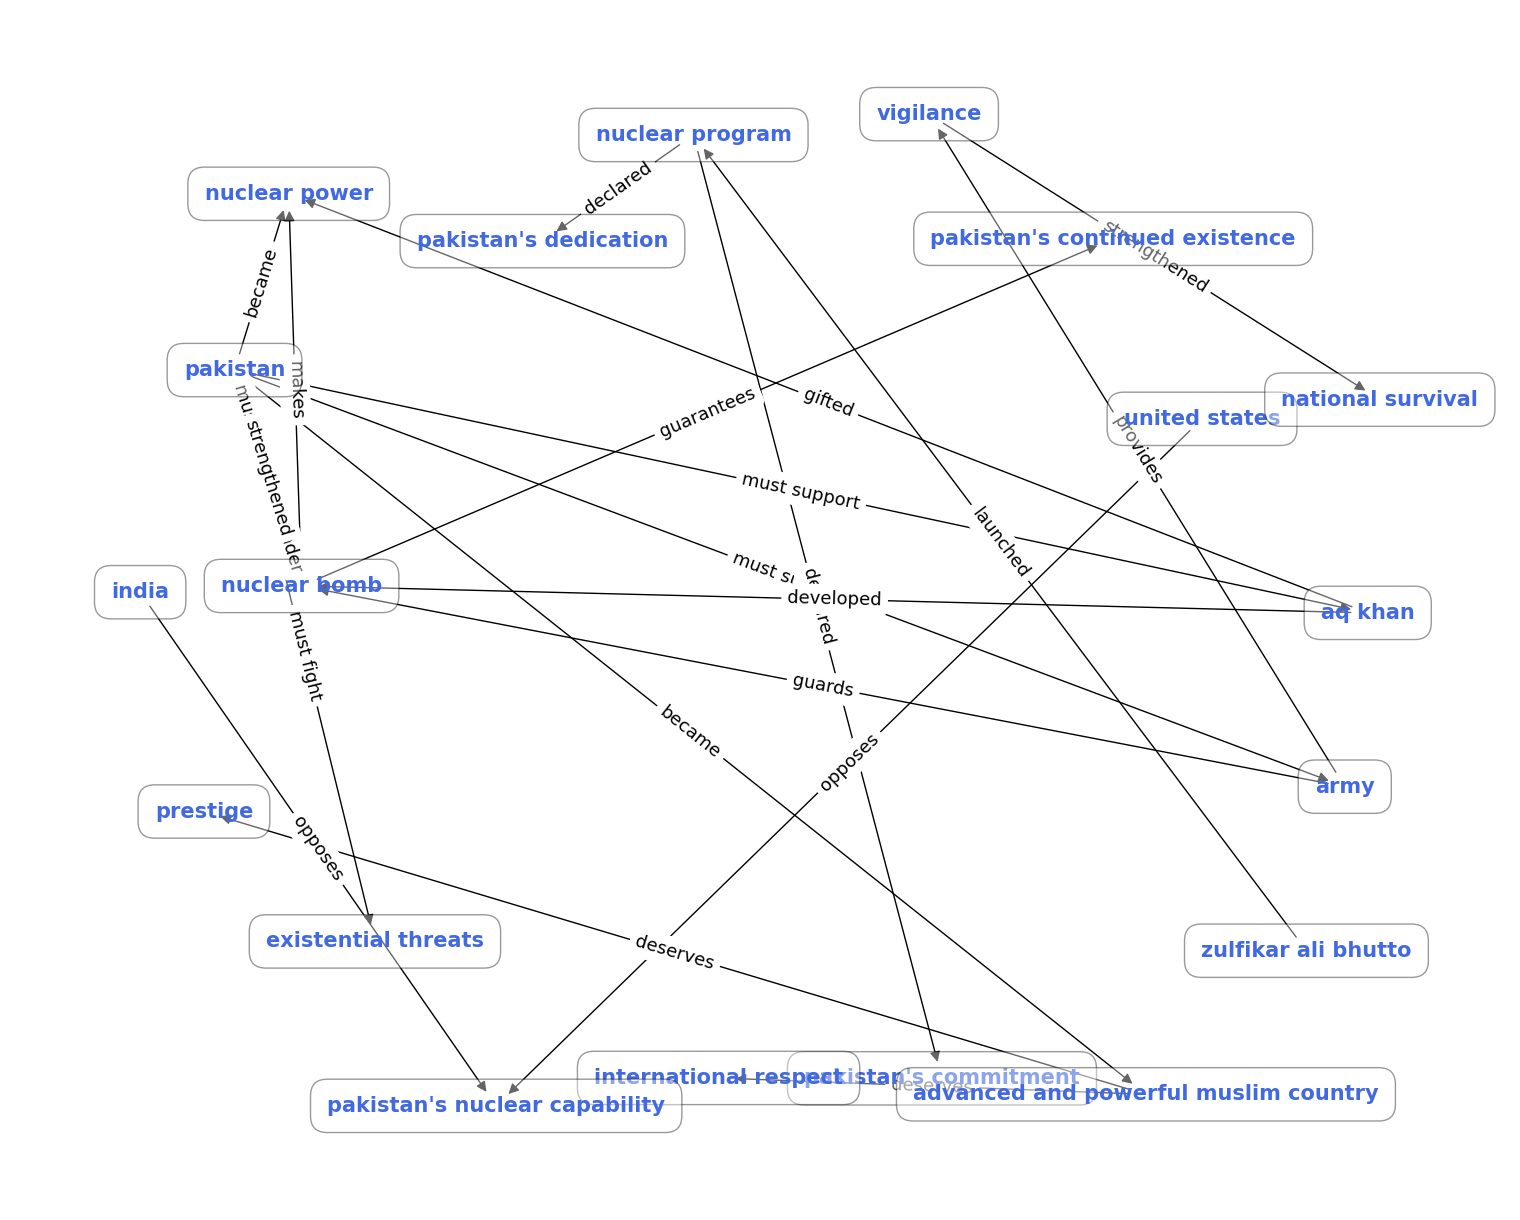

In [7]:
cmap = nx.DiGraph()

for triple in correctTriples:
    s = str(triple[0])    
    d = str(triple[2])
    cmap.add_edge(s, d, predicate=triple[1])
    #print(triple)

print("Nodes:",len(cmap.nodes))
print("Edges:",len(cmap.edges))
for e in cmap.edges(data=True):
    print(e[0],",",e[2],",",e[1])

pos = nx.spring_layout(cmap, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cmap, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cmap.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cmap,'predicate')
nx.draw_networkx_edge_labels(cmap, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Dump the Knowledge Graph on "Knowledge Graph.json" 

# Create Causal Trigger Words Dictionary along with their synonyms.

# Writing causal trigger words dictionary to text file (dictionary.txt)

# Reading causal trigger words dictionary from text file (dictionary.txt) to list 

In [8]:
synonyms = []

my_file = open(".\dictionary.txt", "r")
  
data = my_file.read()
  
synonyms = data.split("\n")
#print(data_into_list)
my_file.close()

print(len(synonyms))

3227


# Filter Causal triples along with their causal sentences from SVO triples based upon causal trigger words dictionary.

In [9]:
causeffect = [] #without duplicates
causalSentences = [] #with duplicates
#lem = []
lemma_function = WordNetLemmatizer()
for s,st in zip(sentences2,correctTriples):
    check = False
    #st = (str(st[0]),str(st[1]),str(st[2]))
    #synonym = synonym[0]
    tokens = word_tokenize(str(st[1]))
    for token, tag in pos_tag(tokens):
        lemma = lemma_function.lemmatize(token)
        #print(token,lemma)
        #st[1] = lemma
        #lem.append(lemma)
        
    for synonym in synonyms:
        if synonym == lemma:
            #causeffect = [(st[0],st[1],st[2])]
            #strTriples.append((ncl[0],token.text,st[2]))
           # print(st)
            if len(causeffect) == 0:
                causeffect.append(st)
                causalSentences.append(s)
            else:
                for ct in causeffect:
                    if str(st[0]) == str(ct[0]) and str(st[1]) == str(ct[1]) and str(st[2]) == str(ct[2]):
                        check = True
                        break;
                if check == False:
                    causeffect.append(st)
                    causalSentences.append(s)
            #if (len(causeffect) >0 ) and (st in causeffect == False):
                
            #    causeffect.append(st)
            break
    
#causeffect.sort(key = lambda x: x[0])

#for sortedTriple in causeffect:
#    print(sortedTriple)
print(len(causalSentences))
print(len(causeffect))
for causalSentence, causalTriple  in zip(causalSentences, causeffect):
    print(causalSentence, causalTriple)

14
14
zulfikar ali bhutto launched nuclear program. (zulfikar ali bhutto, launched, nuclear program)
nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's commitment)
nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's dedication)
aq khan developed nuclear bomb. (aq khan, developed, nuclear bomb)
nuclear bomb strengthened pakistan. (nuclear bomb, strengthened, pakistan)
nuclear bomb makes nuclear power. (nuclear bomb, makes, nuclear power)
pakistan must never surrender nuclear bomb. (pakistan, must never surrender, nuclear bomb)
pakistan must fight off existential threats. (pakistan, must fight, existential threats)
pakistan must support army and aq khan. (pakistan, must support, army)
pakistan must support army and aq khan. (pakistan, must support, aq khan)
army guards nuclear bomb. (army, guards, nuclear bomb)
army provides vigilance. (army, provides, vigilance)
vig

# Plot the Causal Graph.

Nodes: 13
Edges: 11
zulfikar ali bhutto , {'predicade': 'launched'} , nuclear program
nuclear program , {'predicade': 'declared'} , pakistan's commitment
nuclear program , {'predicade': 'declared'} , pakistan's dedication
aq khan , {'predicade': 'developed'} , nuclear bomb
nuclear bomb , {'predicade': 'strengthened'} , pakistan
nuclear bomb , {'predicade': 'makes'} , nuclear power
nuclear bomb , {'predicade': 'guarantees'} , pakistan's continued existence
pakistan , {'predicade': 'must fight'} , existential threats
pakistan , {'predicade': 'must support'} , army
army , {'predicade': 'provides'} , vigilance
vigilance , {'predicade': 'strengthened'} , national survival


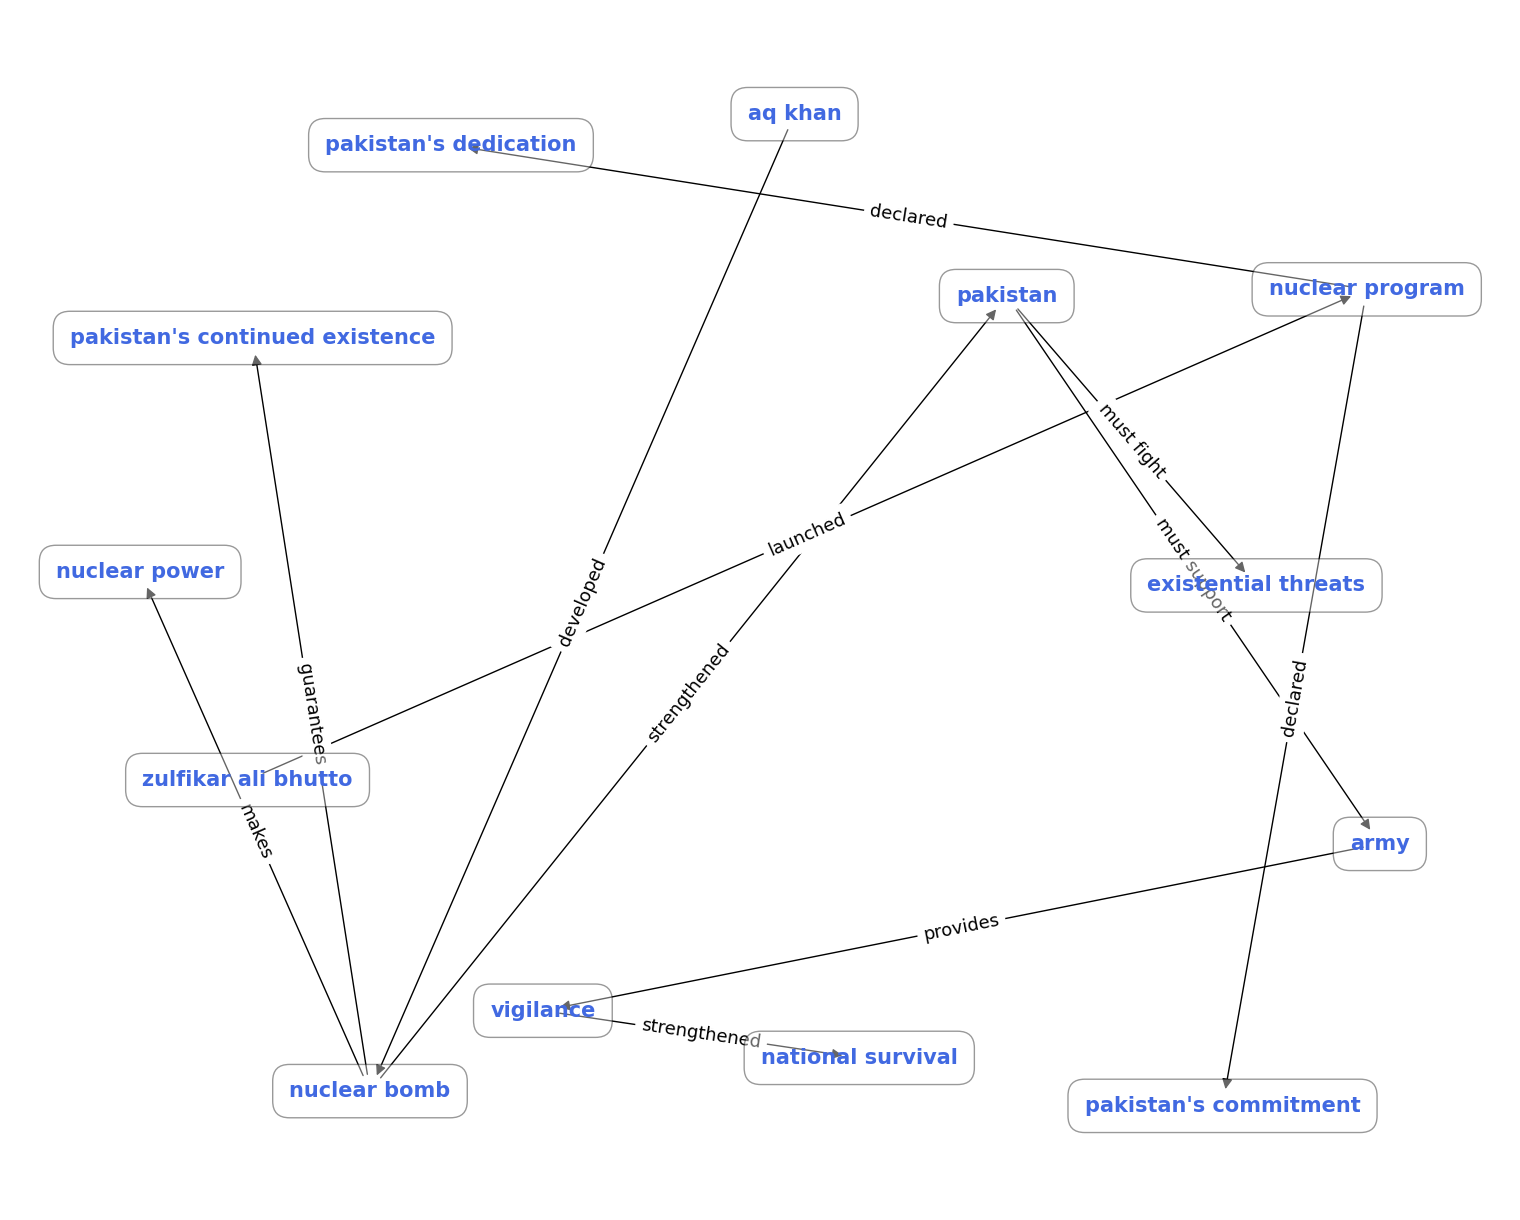

In [10]:
#new (DAG Implementation)
#without duplicates
dagCauseTriples = []
cg = nx.DiGraph()
dagCauseSents = []
dagCauseVerbs = []

for ce,se in zip(causeffect,causalSentences):
    s = str(ce[0])    
    d = str(ce[2])
    #cg.add_node(s,id = str(s),title=str(s),x=615,y=200) #for d3js
    cg.add_node(s,id = str(s),title=str(s),x=615,y=200)
    #cg.add_node(d,id = str(d),title=str(d),x=615,y=200) #for d3js
    cg.add_node(d,id = str(d),title=str(d),x=615,y=200)
    cg.add_edge(s, d, predicade=str(ce[1]))
    dagCauseTriples.append(ce)
    dagCauseSents.append(se)
    dagCauseVerbs.append(str(ce[1]))
    if nx.is_directed_acyclic_graph(cg) is False:
        cg.remove_edge(s, d)
        dagCauseTriples.remove(ce)
        dagCauseSents.remove(se)  
        dagCauseVerbs.remove(str(ce[1]))

print("Nodes:",len(cg.nodes))
print("Edges:",len(cg.edges))
for e in cg.edges(data=True):
    print(e[0],",",e[2],",",e[1])

pos = nx.spring_layout(cg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cg,'predicade')
nx.draw_networkx_edge_labels(cg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Print DAG Causal Triples along with Sentences and Verbs

In [11]:
for causalSentence, causalTriple, causalVerb  in zip(dagCauseSents, dagCauseTriples, dagCauseVerbs):
    print(causalSentence, causalTriple, causalVerb)

zulfikar ali bhutto launched nuclear program. (zulfikar ali bhutto, launched, nuclear program) launched
nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's commitment) declared
nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's dedication) declared
aq khan developed nuclear bomb. (aq khan, developed, nuclear bomb) developed
nuclear bomb strengthened pakistan. (nuclear bomb, strengthened, pakistan) strengthened
nuclear bomb makes nuclear power. (nuclear bomb, makes, nuclear power) makes
pakistan must fight off existential threats. (pakistan, must fight, existential threats) must fight
pakistan must support army and aq khan. (pakistan, must support, army) must support
army provides vigilance. (army, provides, vigilance) provides
vigilance strengthened national survival. (vigilance, strengthened, national survival) strengthened
nuclear bomb guarantees pakistan's conti

# Plot the Causal Graph on using Pyvis "Causal Graph.html" file 

In [12]:
nt = Network("500px", "1000px", notebook=True,directed=True, bgcolor='#ffffff', font_color='black', layout=None, heading='Causal Graph')

for dm in dagCauseTriples:
    #color = "#ffffff"
    nt.add_node(str(dm[0]),shape = 'box',physics='false',color = "#ffffff")
    nt.add_node(str(dm[2]),shape = 'box',physics='false',color = "#ffffff")
    nt.add_edge(str(dm[0]),str(dm[2]),label=str(dm[1]), weight=10, physics='false',color='black')

#nt.show_buttons(filter_=['physics'])
nt.set_edge_smooth('discrete')
nt.show("./Pyvis Graph/Causal Graph.html")

# Dump the Causal Graph on "Causal Graph.json" file 

# Remove Duplicates from Causal Triples

# Remove Duplicates from causalSentences

# Causal Triples' Polarity (Whole) 

### [Pre-trained] Hugging face twitter-XLM-roBERTa-base

In [13]:
# https://huggingface.co/cardiffnlp/twitter-xlm-roberta-base-sentiment?text=extremely+negative
# https://huggingface.co/blog/sentiment-analysis-python
# https://huggingface.co/models?pipeline_tag=text-classification&sort=downloads&search=sentiment

# returns score as output in the range [0,1] 
# mapped to (1,0,-1) -> (pos, neutral, neg)

allen = []
for sent in dagCauseTriples:
    encoded_input = tokenizer(str(sent), return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    if scores[0] > scores[1] and scores[0] > scores[2]:
        score = scores[0] * -1
        allen.append(score)
        # allen.append(-1)
    elif scores[2] > scores[1] and scores[2] > scores[0]:
        allen.append(scores[2])
        # allen.append(1)
    else:
        # allen.append(scores[1])
        allen.append(0)
    
for causalSentence, polarity  in zip(dagCauseTriples, allen):
    print(causalSentence, polarity)

# text = "must fight"
# encoded_input = tokenizer(text, return_tensors='pt')
# output = model(**encoded_input)
# scores = output[0][0].detach().numpy()
# scores = softmax(scores)
# if scores[0] > scores[1] and scores[0] > scores[2]:
#     print('negative')
# elif scores[2] > scores[1] and scores[2] > scores[0]:
#     print('positive')
# else:
#     print('neutral')

# ranking = np.argsort(scores)
# # print(ranking)
# ranking = ranking[::-1]
# for i in range(scores.shape[0]):
#     l = config.id2label[ranking[i]]
#     s = scores[ranking[i]]
#     print(f"{i+1}) {l} {np.round(float(s), 4)}")

(zulfikar ali bhutto, launched, nuclear program) 0
(nuclear program, declared, pakistan's commitment) 0
(nuclear program, declared, pakistan's dedication) 0.47159895
(aq khan, developed, nuclear bomb) 0
(nuclear bomb, strengthened, pakistan) 0
(nuclear bomb, makes, nuclear power) 0
(pakistan, must fight, existential threats) -0.8371369242668152
(pakistan, must support, army) 0
(army, provides, vigilance) 0
(vigilance, strengthened, national survival) 0.49825975
(nuclear bomb, guarantees, pakistan's continued existence) 0


### [Afinn]

In [61]:
#https://darenr.github.io/afinn/
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-affin/
#https://github.com/thisandagain/sentiment

# returns score as output in the range [-5,5] 
# mapped to (1,0,-1) -> (pos, neutral, neg)

afinn = []
for sent in dagCauseTriples:
    #print(str(sent))
    score = afn.score(str(sent))
    # print(score)
    if score < -5:
        score = -5
    elif score > 5:
        score = 5
    score = score/5
    afinn.append(score)
    # if score > 0:
    #     #print('positive')
    #     afinn.append(1)
    # elif score < 0:
    #     #print('negative')
    #     afinn.append(-1)
    # else:
    #     #print('neutral')
    #     afinn.append(0)
        
for causalSentence, polarity  in zip(dagCauseTriples, afinn):
    print(causalSentence, polarity)

(zulfikar ali bhutto, launched, nuclear program) 0.2
(nuclear program, declared, pakistan's commitment) 0.4
(nuclear program, declared, pakistan's dedication) 0.4
(aq khan, developed, nuclear bomb) -0.2
(nuclear bomb, strengthened, pakistan) 0.2
(nuclear bomb, makes, nuclear power) -0.2
(pakistan, must fight, existential threats) -0.6
(pakistan, must support, army) 0.4
(army, provides, vigilance) 0.0
(vigilance, strengthened, national survival) 0.4
(nuclear bomb, guarantees, pakistan's continued existence) -0.2


### [Vader]

In [15]:
#https://github.com/cjhutto/vaderSentiment#about-the-scoring

# returns compound score as output in the range [-1,1] 
# mapped to (1,0,-1) -> (pos, neutral, neg)

vader = []

def vadersentimentanalysis(review):
    # negpos = []
    vs = analyzer.polarity_scores(review)
    return vs['compound']
    # negpos.append(vs['neg'])
    # negpos.append(vs['pos'])
    # return negpos

# def vader_analysis(compound):
#     # print(compound)
#     if compound >= 0.05:
#     #if compound > 0:
#         vader.append(1)
#         return 'Positive'
#     elif compound <= -0.05 :
#     #elif compound < 0:
#         vader.append(-1)
#         return 'Negative'
#     elif  compound > -0.05 and compound < 0.05:
#     #elif  compound == 0:
#         vader.append(0)
#         return 'Neutral'

# def vader_analysis(negpos):
#      if negpos[0] > negpos[1]:
#         vader.append(-1)
#         return 'Negative'
#      elif negpos[1] > negpos[0]:
#         vader.append(1)
#         return 'Positive'
    
for sent in dagCauseTriples:
    #print(sent)
    compound = vadersentimentanalysis(str(sent))
    # print(compound)
    vader.append(compound)
    # vader_analysis(compound)
    
for causalSentence, polarity  in zip(dagCauseTriples, vader):
    print(causalSentence, polarity)

(zulfikar ali bhutto, launched, nuclear program) 0.128
(nuclear program, declared, pakistan's commitment) 0.3818
(nuclear program, declared, pakistan's dedication) 0.0
(aq khan, developed, nuclear bomb) -0.4939
(nuclear bomb, strengthened, pakistan) -0.1027
(nuclear bomb, makes, nuclear power) -0.4939
(pakistan, must fight, existential threats) -0.6597
(pakistan, must support, army) 0.4019
(army, provides, vigilance) 0.0
(vigilance, strengthened, national survival) 0.4215
(nuclear bomb, guarantees, pakistan's continued existence) -0.4939


### [SentiStrength]

In [55]:
#http://sentistrength.wlv.ac.uk/
#http://paper.ijcsns.org/07_book/202001/20200107.pdf
#https://pypi.org/project/sentistrength/
#http://sentistrength.wlv.ac.uk/results.php?text=pakistan+must+support+army+and+aq+khan.&submit=Detect+Sentiment&result=trinary
#https://professorkhan.com/2019/03/29/sentiment-analysis-with-sentistrength/

# returns score as output in the range [-4,4] 
# mapped to (1,0,-1) -> (pos, neutral, neg)

sentiStrength = []

for sent in dagCauseTriples:
    #print(sent)
    result = senti.getSentiment(str(sent), score='scale')
    # print(result)
    result = result[0]/4
    sentiStrength.append(result)
    # if result[0] > 0:
    #     #print('Positive')
    #     sentiStrength.append(1)
    # elif result[0] < 0:
    #     sentiStrength.append(-1)
    #     #print('Negative')
    # else:
    #     sentiStrength.append(0)
    # #    print('Neutral')

for causalSentence, polarity  in zip(dagCauseTriples, sentiStrength):
    print(causalSentence, polarity)

[0]
[0]
[0]
[-1]
[-1]
[-1]
[-2]
[1]
[0]
[0]
[-1]
(zulfikar ali bhutto, launched, nuclear program) 0.0
(nuclear program, declared, pakistan's commitment) 0.0
(nuclear program, declared, pakistan's dedication) 0.0
(aq khan, developed, nuclear bomb) -0.25
(nuclear bomb, strengthened, pakistan) -0.25
(nuclear bomb, makes, nuclear power) -0.25
(pakistan, must fight, existential threats) -0.5
(pakistan, must support, army) 0.25
(army, provides, vigilance) 0.0
(vigilance, strengthened, national survival) 0.0
(nuclear bomb, guarantees, pakistan's continued existence) -0.25


### Data Frame (Causal Triples Whole)

In [17]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

df2 = pd.DataFrame(list(zip(dagCauseTriples, allen, afinn, vader,sentiStrength)), columns =['Causal Triple', 'HuggingFace','Afinn','Vader','SentiStrength'])
df2["Weight"] = round(df2.sum(axis=1),2)

sentPolarity = []
triplesWeight_sentLevel = []

for index, row in df2.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    triplesWeight_sentLevel.append(tripleWeightTuple)
    #print(weight)
    if weight >= -4.0 and weight < -3.0:
        sentPolarity.append('Strong Negative') 
    elif weight >= -3 and weight < -2:
        sentPolarity.append('Moderate Negative')
    elif weight >= -2 and weight < -1:
        sentPolarity.append('Mild Negative')
    elif weight >= -1 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 4 and weight > 3:
        sentPolarity.append('Strong Positive')
    elif weight <= 3 and weight > 2:
        sentPolarity.append('Moderate Positive')
    elif weight <= 2 and weight > 1:
        sentPolarity.append('Mild Positive')
    elif weight <= 1 and weight > 0:
        sentPolarity.append('Weak Positive')

df2["Polarity"] = sentPolarity
df2.style

c:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,Causal Triple,HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,"(zulfikar ali bhutto, launched, nuclear program)",0.000000,0.200000,0.128000,0.000000,0.330000,Weak Positive
1,"(nuclear program, declared, pakistan's commitment)",0.000000,0.400000,0.381800,0.000000,0.780000,Weak Positive
2,"(nuclear program, declared, pakistan's dedication)",0.471599,0.400000,0.000000,0.000000,0.870000,Weak Positive
3,"(aq khan, developed, nuclear bomb)",0.000000,-0.200000,-0.493900,-0.250000,-0.940000,Weak Negative
4,"(nuclear bomb, strengthened, pakistan)",0.000000,0.200000,-0.102700,-0.250000,-0.150000,Weak Negative
5,"(nuclear bomb, makes, nuclear power)",0.000000,-0.200000,-0.493900,-0.250000,-0.940000,Weak Negative
6,"(pakistan, must fight, existential threats)",-0.837137,-0.600000,-0.659700,-0.500000,-2.600000,Moderate Negative
7,"(pakistan, must support, army)",0.000000,0.400000,0.401900,0.250000,1.050000,Mild Positive
8,"(army, provides, vigilance)",0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
9,"(vigilance, strengthened, national survival)",0.498260,0.400000,0.421500,0.000000,1.320000,Mild Positive


# Causal Sentences' Polarity (Whole) 

### [Pre-trained] Hugging face twitter-XLM-roBERTa-base

In [18]:
def Allen_sents_SentLevel(causalSentences):
    allen = []
    for sent in causalSentences:
        encoded_input = tokenizer(str(sent), return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        if scores[0] > scores[1] and scores[0] > scores[2]:
            score = scores[0] * -1
            allen.append(score)
            # allen.append(-1)
        elif scores[2] > scores[1] and scores[2] > scores[0]:
            allen.append(scores[2])
            # allen.append(1)
        else:
            # allen.append(scores[1])
            allen.append(0)
    return allen

### [Afinn]

In [19]:
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-affin/

#output (Pos,neg,neural)
def Afinn_sents_SentLevel(causalSentences):
    afinn = []
    for sent in causalSentences:
        #print(sent)
        score = afn.score(str(sent))
        #print(score)
        if score < -5:
            score = -5
        elif score > 5:
            score = 5
        score = score/5
        afinn.append(score)
        # if score > 0:
        #     #print('positive')
        #     afinn.append(1)
        # elif score < 0:
        #     #print('negative')
        #     afinn.append(-1)
        # else:
        #     #print('neutral')
        #     afinn.append(0)
    return afinn

#for causalSentence, polarity  in zip(causalSentences, afinn):
#    print(causalSentence, polarity)

### [Vader]

In [20]:
#https://github.com/cjhutto/vaderSentiment#about-the-scoring
#output (Pos,neg,neural)

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    #print(vs)
    return vs['compound']

# def vader_analysis(compound):
#     #vader = []
#     if compound >= 0.05:
#         #vader.append(1)
#         return 1
#     elif compound <= -0.05 :
#         #vader.append(-1)
#         return -1
        
#     elif  compound > -0.05 and compound < 0.05:
#         #vader.append(0)
#         return 0
#     #return vader
    
def Vader_sents_SentLevel(causalSentences):
    vader = []
    for sent in causalSentences:
        #print(sent)
        #vaderTup = []
        compound = vadersentimentanalysis(str(sent))
        vader.append(compound)
        # res = vader_analysis(compound)
        #vaderTup.append(res)
        # vader.append(res)
    return vader

#vader = Vader_sents_SentLevel(causalSents)
#vader
#for causalSentence, polarity  in zip(causalSentences, vader):
#    print(causalSentence, polarity)

### [SentiStrength]

In [21]:
#http://sentistrength.wlv.ac.uk/
#http://paper.ijcsns.org/07_book/202001/20200107.pdf
#https://pypi.org/project/sentistrength/
#http://sentistrength.wlv.ac.uk/results.php?text=pakistan+must+support+army+and+aq+khan.&submit=Detect+Sentiment&result=trinary
#https://professorkhan.com/2019/03/29/sentiment-analysis-with-sentistrength/
#output (Pos,neg)

def Senti_sents_SentLevel(causalSentences):
    sentiStrength = []
    for sent in causalSentences:
        #print(sent)
        result = senti.getSentiment(str(sent), score='scale')
        #print(result)
        result = result[0]/4
        sentiStrength.append(result)
        # if result[0] > 0:
        #     sentiStrength.append(1)
        # elif result[0] < 0:
        #     sentiStrength.append(-1)
        # else:
        #     sentiStrength.append(0)
    return sentiStrength

#for causalSentence, polarity  in zip(causalSentences, sentiStrength):
#    print(causalSentence, polarity)

### [SentiWordnet]

### [SentiWordNet OnlyVerbs]

### Detect Causal Sentences' Polarity (Sent Level) without duplicates

### Detect Causal Sentences' Polarity (Sent Level) with duplicates

### Data Frame (Causal Sentence at Sentence Level)

In [22]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

allen = Allen_sents_SentLevel(dagCauseSents)
afinn = Afinn_sents_SentLevel(dagCauseSents)
vader = Vader_sents_SentLevel(dagCauseSents)
sentiStrength = Senti_sents_SentLevel(dagCauseSents)

df2 = pd.DataFrame(list(zip(dagCauseSents, allen, afinn, vader,sentiStrength)), columns =['Causal Sentence', 'HuggingFace','Afinn','Vader','SentiStrength'])
df2["Weight"] = round(df2.sum(axis=1),2)

sentPolarity = []
sentsWeight_sentLevel = []

for index, row in df2.iterrows():
    sentWeightTuple = []
    weight = row['Weight']
    sentWeightTuple.append(weight)
    sentsWeight_sentLevel.append(sentWeightTuple)
    #print(weight)
    if weight >= -4.0 and weight < -3.0:
        sentPolarity.append('Strong Negative') 
    elif weight >= -3 and weight < -2:
        sentPolarity.append('Moderate Negative')
    elif weight >= -2 and weight < -1:
        sentPolarity.append('Mild Negative')
    elif weight >= -1 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 4 and weight > 3:
        sentPolarity.append('Strong Positive')
    elif weight <= 3 and weight > 2:
        sentPolarity.append('Moderate Positive')
    elif weight <= 2 and weight > 1:
        sentPolarity.append('Mild Positive')
    elif weight <= 1 and weight > 0:
        sentPolarity.append('Weak Positive')

df2["Polarity"] = sentPolarity
df2.style

c:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == "__main__":


,Causal Sentence,HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,zulfikar ali bhutto launched nuclear program.,0.000000,0.200000,0.128000,0.000000,0.330000,Weak Positive
1,nuclear program declared pakistan's commitment and pakistan's dedication.,0.569364,0.800000,0.381800,0.000000,1.750000,Mild Positive
2,nuclear program declared pakistan's commitment and pakistan's dedication.,0.569364,0.800000,0.381800,0.000000,1.750000,Mild Positive
3,aq khan developed nuclear bomb.,0.000000,-0.200000,-0.493900,-0.250000,-0.940000,Weak Negative
4,nuclear bomb strengthened pakistan.,0.574961,0.200000,-0.102700,-0.250000,0.420000,Weak Positive
5,nuclear bomb makes nuclear power.,0.000000,-0.200000,-0.493900,-0.250000,-0.940000,Weak Negative
6,pakistan must fight off existential threats.,-0.562618,-0.600000,-0.659700,-0.500000,-2.320000,Moderate Negative
7,pakistan must support army and aq khan.,0.364531,0.400000,0.401900,0.250000,1.420000,Mild Positive
8,army provides vigilance.,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
9,vigilance strengthened national survival.,0.759688,0.400000,0.421500,0.000000,1.580000,Mild Positive


# Causal Triples' Polarity (Token Level) 

### [Pre-trained] Hugging face twitter-XLM-roBERTa-base

In [23]:
allen_word = []
allen_tuple = []

for tokenTuple in dagCauseTriples:
    # print(tokenTuple)
    for token in tokenTuple:
        # print(token)
        encoded_input = tokenizer(str(token), return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        # print(scores)
        if scores[0] > scores[1] and scores[0] > scores[2]:
            score = scores[0] * -1
            allen_tuple.append(score)
            # allen_tuple.append(-1)
        elif scores[2] > scores[1] and scores[2] > scores[0]:
            allen_tuple.append(scores[2])
            # allen_tuple.append(1)
        else:
            # allen_tuple.append(scores[1])
            allen_tuple.append(0)
    allen_word.append(allen_tuple)
    allen_tuple = []
                
for a,b in zip(dagCauseTriples,allen_word):
    print(a,b)

(zulfikar ali bhutto, launched, nuclear program) [0, 0, 0]
(nuclear program, declared, pakistan's commitment) [0, 0, 0.3956261]
(nuclear program, declared, pakistan's dedication) [0, 0, 0.5339591]
(aq khan, developed, nuclear bomb) [0, 0, -0.43276506662368774]
(nuclear bomb, strengthened, pakistan) [-0.43276506662368774, 0.3786225, -0.38700076937675476]
(nuclear bomb, makes, nuclear power) [-0.43276506662368774, 0, 0]
(pakistan, must fight, existential threats) [-0.38700076937675476, -0.4653697907924652, -0.8218232989311218]
(pakistan, must support, army) [-0.38700076937675476, 0.41911653, 0]
(army, provides, vigilance) [0, 0, -0.42470499873161316]
(vigilance, strengthened, national survival) [-0.42470499873161316, 0.3786225, 0]
(nuclear bomb, guarantees, pakistan's continued existence) [-0.43276506662368774, 0, 0]


### [Afinn] 

In [24]:
afinn_word = []
afinn_tuple = []

for tokenTuple in dagCauseTriples:
    #print(sent)
    for token in tokenTuple:
        #if str(token) != ".": #or str(token) != ',' or str(token) != "-":
        #if str(token) not in marks:
            #print(token)
        score = afn.score(str(token))
        if score < -5:
            score = -5
        elif score > 5:
            score = 5
        score = score/5
        afinn_tuple.append(score)
        # if score > 0:
        #         #print('positive')
        #     afinn_tuple.append(1)
        # elif score < 0:
        #         #print('negative')
        #     afinn_tuple.append(-1)
        # else:
        #         #print('neutral')
        #     afinn_tuple.append(0)
    afinn_word.append(afinn_tuple)
    afinn_tuple = []

for a,b in zip(dagCauseTriples,afinn_word):
   # print(len(a))
    print(a,b)

(zulfikar ali bhutto, launched, nuclear program) [0.0, 0.2, 0.0]
(nuclear program, declared, pakistan's commitment) [0.0, 0.0, 0.4]
(nuclear program, declared, pakistan's dedication) [0.0, 0.0, 0.4]
(aq khan, developed, nuclear bomb) [0.0, 0.0, -0.2]
(nuclear bomb, strengthened, pakistan) [-0.2, 0.4, 0.0]
(nuclear bomb, makes, nuclear power) [-0.2, 0.0, 0.0]
(pakistan, must fight, existential threats) [0.0, -0.2, -0.4]
(pakistan, must support, army) [0.0, 0.4, 0.0]
(army, provides, vigilance) [0.0, 0.0, 0.0]
(vigilance, strengthened, national survival) [0.0, 0.4, 0.0]
(nuclear bomb, guarantees, pakistan's continued existence) [-0.2, 0.0, 0.0]


### [Vader] 

In [25]:
vader_word = []
vader_tuple = []

for tokenTuple in dagCauseTriples:
    #print(sent)
    for token in tokenTuple:
        #if str(token) not in marks:
        vs = analyzer.polarity_scores(str(token))
        compound = vs['compound']
        vader_tuple.append(compound)
        # if compound >= 0.05:
        #     vader_tuple.append(1)   
        # elif compound <= -0.05 :
        #     vader_tuple.append(-1)
        # elif  compound > -0.05 and compound < 0.05:
        #     vader_tuple.append(0)
    vader_word.append(vader_tuple)
    vader_tuple = []

for a,b in zip(dagCauseTriples,vader_word):
    #print(len(a))
    print(a,b)

(zulfikar ali bhutto, launched, nuclear program) [0.0, 0.128, 0.0]
(nuclear program, declared, pakistan's commitment) [0.0, 0.0, 0.3818]
(nuclear program, declared, pakistan's dedication) [0.0, 0.0, 0.0]
(aq khan, developed, nuclear bomb) [0.0, 0.0, -0.4939]
(nuclear bomb, strengthened, pakistan) [-0.4939, 0.4215, 0.0]
(nuclear bomb, makes, nuclear power) [-0.4939, 0.0, 0.0]
(pakistan, must fight, existential threats) [0.0, -0.3818, -0.4215]
(pakistan, must support, army) [0.0, 0.4019, 0.0]
(army, provides, vigilance) [0.0, 0.0, 0.0]
(vigilance, strengthened, national survival) [0.0, 0.4215, 0.0]
(nuclear bomb, guarantees, pakistan's continued existence) [-0.4939, 0.0, 0.0]


### [SentiStrength] 

In [26]:
senti_word = []
senti_tuple = []

for tokenTuple in dagCauseTriples:
    #print(tokenTuple)
    for token in tokenTuple:
        #if str(token) not in marks:
        #print(token)
        result = senti.getSentiment(str(token), score='scale')
            #print(result)
        result = result[0]/4
        senti_tuple.append(result)
        # if result[0] > 0:
        #     senti_tuple.append(1)
        # elif result[0] < 0:
        #     senti_tuple.append(-1)
        # else:
        #     senti_tuple.append(0)
    senti_word.append(senti_tuple)
    senti_tuple = []
    
for a,b in zip(dagCauseTriples,senti_word):
    #print(len(a))
    print(a,b)

(zulfikar ali bhutto, launched, nuclear program) [0.0, 0.0, 0.0]
(nuclear program, declared, pakistan's commitment) [0.0, 0.0, 0.0]
(nuclear program, declared, pakistan's dedication) [0.0, 0.0, 0.0]
(aq khan, developed, nuclear bomb) [0.0, 0.0, -0.25]
(nuclear bomb, strengthened, pakistan) [-0.25, 0.0, 0.0]
(nuclear bomb, makes, nuclear power) [-0.25, 0.0, 0.0]
(pakistan, must fight, existential threats) [0.0, -0.5, -0.5]
(pakistan, must support, army) [0.0, 0.25, 0.0]
(army, provides, vigilance) [0.0, 0.0, 0.0]
(vigilance, strengthened, national survival) [0.0, 0.0, 0.0]
(nuclear bomb, guarantees, pakistan's continued existence) [-0.25, 0.0, 0.0]


### Data Frame (Causal Triples Token Level)

In [27]:
sum_list = []
sum_tup = []
limit= len(dagCauseTriples)
#print(limit)

for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    for j in range(0,len(allen_word[i])):
        if afinn_word[i][j] == 0 and vader_word[i][j]== 0 and senti_word[i][j] == 0 and allen_word[i][j] == 0:
            res = 0
            #check = 1
        else:
            res = allen_word[i][j]+afinn_word[i][j]+vader_word[i][j]+senti_word[i][j]
        #print(res)
        sum_tup.append(res)
    sum_list.append(sum_tup)
    sum_tup = []
    
def DetectPolarity(sum_list):
    tokenPolarity = []
    tokenPolarity_list = []
    for s in sum_list:
        for weight in s:
            if weight >= -4.0 and weight < -3.0:
                tokenPolarity.append('Strong Negative') 
            elif weight >= -3 and weight < -2:
                tokenPolarity.append('Moderate Negative')
            elif weight >= -2 and weight < -1:
                tokenPolarity.append('Mild Negative')
            elif weight >= -1 and weight < 0:
                tokenPolarity.append('Weak Negative')
            elif weight == 0:
                tokenPolarity.append('Neutral')
            elif weight <= 4 and weight > 3:
                tokenPolarity.append('Strong Positive')
            elif weight <= 3 and weight > 2:
                tokenPolarity.append('Moderate Positive')
            elif weight <= 2 and weight > 1:
                tokenPolarity.append('Mild Positive')
            elif weight <= 1 and weight > 0:
                tokenPolarity.append('Weak Positive')
        tokenPolarity_list.append(tokenPolarity)
        tokenPolarity = []
    return tokenPolarity_list

tokenPolarity_list = DetectPolarity(sum_list)

triplesWeight_TokenLevel = []
weightSumTup = []
for t in sum_list:
    tripleWeight = 0
    total = 0
    #print(total)
    for w in t:
        #print(w)
        if w == 0:
            total = total
        else:
            total = total + 1
        tripleWeight = tripleWeight + w
    #print(total)
    if tripleWeight != 0:
        tripleWeight = round(tripleWeight/total, 2)
    weightSumTup.append(tripleWeight)
    triplesWeight_TokenLevel.append(weightSumTup)
    weightSumTup = []

triplePolarity_list = DetectPolarity(triplesWeight_TokenLevel)

#Old algorithm that detects triples' polarity by counting the token polarities with highest frequency
#maxPolarity = []
#triplePolarity_list = []
#for t in tokenPolarity_list:
#    counter=collections.Counter(t)
#    maxPolarity.append(counter.most_common(1)[0][0])
#    triplePolarity_list.append(maxPolarity)
#    maxPolarity = []

def dataframe_WordLevel(i):
    #print(dagCauseTriples[i])
    df = pd.DataFrame([dagCauseTriples[i],allen_word[i],afinn_word[i],vader_word[i],senti_word[i],sum_list[i],tokenPolarity_list[i],triplesWeight_TokenLevel[i],triplePolarity_list[i]], 
                      index =   ['Tokens','HuggingFace','Afinn','Vader','SentiStrength','Token Weight','Token Polarity','Triple Weight','Triple Polarity'])
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    return df

for i in range(0,limit):
    df = dataframe_WordLevel(i)
    #df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
    #display(df)
    #df.to_excel(r'./Text/output.xlsx', index = False)
    replicator(df)

#for s,w,p in zip(sum_list,weightSum,triplePolarity_list):
#    print(s,w,p)

,0,1,2
Tokens,"(zulfikar, ali, bhutto)",(launched),"(nuclear, program)"
HuggingFace,0,0,0
Afinn,0.0,0.2,0.0
Vader,0.0,0.128,0.0
SentiStrength,0.0,0.0,0.0
Token Weight,0,0.328,0
Token Polarity,Neutral,Weak Positive,Neutral
Triple Weight,0.33,None,None
Triple Polarity,Weak Positive,None,None


,0,1,2
Tokens,"(nuclear, program)",(declared),"(pakistan, 's, commitment)"
HuggingFace,0,0,0.395626
Afinn,0.0,0.0,0.4
Vader,0.0,0.0,0.3818
SentiStrength,0.0,0.0,0.0
Token Weight,0,0,1.177426
Token Polarity,Neutral,Neutral,Mild Positive
Triple Weight,1.18,None,None
Triple Polarity,Mild Positive,None,None


,0,1,2
Tokens,"(nuclear, program)",(declared),"(pakistan, 's, dedication)"
HuggingFace,0,0,0.533959
Afinn,0.0,0.0,0.4
Vader,0.0,0.0,0.0
SentiStrength,0.0,0.0,0.0
Token Weight,0,0,0.933959
Token Polarity,Neutral,Neutral,Weak Positive
Triple Weight,0.93,None,None
Triple Polarity,Weak Positive,None,None


,0,1,2
Tokens,"(aq, khan)",(developed),"(nuclear, bomb)"
HuggingFace,0,0,-0.432765
Afinn,0.0,0.0,-0.2
Vader,0.0,0.0,-0.4939
SentiStrength,0.0,0.0,-0.25
Token Weight,0,0,-1.376665
Token Polarity,Neutral,Neutral,Mild Negative
Triple Weight,-1.38,None,None
Triple Polarity,Mild Negative,None,None


,0,1,2
Tokens,"(nuclear, bomb)",(strengthened),(pakistan)
HuggingFace,-0.432765,0.378623,-0.387001
Afinn,-0.2,0.4,0.0
Vader,-0.4939,0.4215,0.0
SentiStrength,-0.25,0.0,0.0
Token Weight,-1.376665,1.200123,-0.387001
Token Polarity,Mild Negative,Mild Positive,Weak Negative
Triple Weight,-0.19,None,None
Triple Polarity,Weak Negative,None,None


,0,1,2
Tokens,"(nuclear, bomb)",(makes),"(nuclear, power)"
HuggingFace,-0.432765,0,0
Afinn,-0.2,0.0,0.0
Vader,-0.4939,0.0,0.0
SentiStrength,-0.25,0.0,0.0
Token Weight,-1.376665,0,0
Token Polarity,Mild Negative,Neutral,Neutral
Triple Weight,-1.38,None,None
Triple Polarity,Mild Negative,None,None


,0,1,2
Tokens,(pakistan),"(must, fight)","(existential, threats)"
HuggingFace,-0.387001,-0.46537,-0.821823
Afinn,0.0,-0.2,-0.4
Vader,0.0,-0.3818,-0.4215
SentiStrength,0.0,-0.5,-0.5
Token Weight,-0.387001,-1.54717,-2.143323
Token Polarity,Weak Negative,Mild Negative,Moderate Negative
Triple Weight,-1.36,None,None
Triple Polarity,Mild Negative,None,None


,0,1,2
Tokens,(pakistan),"(must, support)",(army)
HuggingFace,-0.387001,0.419117,0
Afinn,0.0,0.4,0.0
Vader,0.0,0.4019,0.0
SentiStrength,0.0,0.25,0.0
Token Weight,-0.387001,1.471017,0
Token Polarity,Weak Negative,Mild Positive,Neutral
Triple Weight,0.54,None,None
Triple Polarity,Weak Positive,None,None


,0,1,2
Tokens,(army),(provides),(vigilance)
HuggingFace,0,0,-0.424705
Afinn,0.0,0.0,0.0
Vader,0.0,0.0,0.0
SentiStrength,0.0,0.0,0.0
Token Weight,0,0,-0.424705
Token Polarity,Neutral,Neutral,Weak Negative
Triple Weight,-0.42,None,None
Triple Polarity,Weak Negative,None,None


,0,1,2
Tokens,(vigilance),(strengthened),"(national, survival)"
HuggingFace,-0.424705,0.378623,0
Afinn,0.0,0.4,0.0
Vader,0.0,0.4215,0.0
SentiStrength,0.0,0.0,0.0
Token Weight,-0.424705,1.200123,0
Token Polarity,Weak Negative,Mild Positive,Neutral
Triple Weight,0.39,None,None
Triple Polarity,Weak Positive,None,None


,0,1,2
Tokens,"(nuclear, bomb)",(guarantees),"(pakistan, 's, continued, existence)"
HuggingFace,-0.432765,0,0
Afinn,-0.2,0.0,0.0
Vader,-0.4939,0.0,0.0
SentiStrength,-0.25,0.0,0.0
Token Weight,-1.376665,0,0
Token Polarity,Mild Negative,Neutral,Neutral
Triple Weight,-1.38,None,None
Triple Polarity,Mild Negative,None,None


# Causal Sentences' Polarity (Token Level) 

### Generating list of tokens without stop words and punctuation marks.

In [28]:
def GenerateTokens(causalSentences):
    marks = ['.',',','(',')','-',':',';','/',"'s",'_','__','--','"', '’', '—']
    token_list = []
   
    for sent in causalSentences:
        token_tuple = []
        for token in sent:
            if str(token) not in marks:
                if str(token) not in stopwords.words():
                    token_tuple.append(str(token))
        token_list.append(token_tuple)
    return token_list
        
#print(len(token_list))
#print(token_list)

### [Pre-trained] Hugging face twitter-XLM-roBERTa-base

In [29]:
def Allen_sents_TokenLevel(token_list):
    allen_word = []
    allen_tuple = []
    for tokenTuple in token_list:
        # print(tokenTuple)
        for token in tokenTuple:
            # print(token)
            encoded_input = tokenizer(str(token), return_tensors='pt')
            output = model(**encoded_input)
            scores = output[0][0].detach().numpy()
            scores = softmax(scores)
            if scores[0] > scores[1] and scores[0] > scores[2]:
                score = scores[0] * -1
                allen_tuple.append(score)
            elif scores[2] > scores[1] and scores[2] > scores[0]:
                allen_tuple.append(scores[2])
            else:
                # allen_tuple.append(scores[1])
                allen_tuple.append(0)
        allen_word.append(allen_tuple)
        allen_tuple = []
    return allen_word

### [Afinn] 

In [30]:
def Afinn_sents_TokenLevel(token_list):
    afinn_word = []
    afinn_tuple = []

    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) != ".": #or str(token) != ',' or str(token) != "-":
            #if str(token) not in marks:
                #print(token)
            score = afn.score(str(token))
            if score < -5:
                score = -5
            elif score > 5:
                score = 5
            score = score/5
            afinn_tuple.append(score)
            # if score > 0:
            #         #print('positive')
            #     afinn_tuple.append(1)
            # elif score < 0:
            #         #print('negative')
            #     afinn_tuple.append(-1)
            # else:
            #         #print('neutral')
            #     afinn_tuple.append(0)
        afinn_word.append(afinn_tuple)
        afinn_tuple = []
    return afinn_word

#for a in afinn_word:
#    print(len(a))
#    print(a)

### [Vader] 

In [31]:
def Vader_sents_TokenLevel(token_list):
    vader_word = []
    vader_tuple = []

    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) not in marks:
            vs = analyzer.polarity_scores(str(token))
            compound = vs['compound']
            vader_tuple.append(compound)
            # if compound >= 0.05:
            #     vader_tuple.append(1)   
            # elif compound <= -0.05 :
            #     vader_tuple.append(-1)
            # elif  compound > -0.05 and compound < 0.05:
            #     vader_tuple.append(0)
        vader_word.append(vader_tuple)
        vader_tuple = []
    return vader_word

#for a in vader_word:
#    print(len(a))
#    print(a)

### [SentiStrength] 

In [32]:
def Senti_sents_TokenLevel(token_list):
    senti_word = []
    senti_tuple = []
    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) not in marks:
                #print(token)
            result = senti.getSentiment(str(token), score='scale')
                #print(result)
            result = result[0]/4
            senti_tuple.append(result)
            # if result[0] > 0:
            #     senti_tuple.append(1)
            # elif result[0] < 0:
            #     senti_tuple.append(-1)
            # else:
            #     senti_tuple.append(0)
        senti_word.append(senti_tuple)
        senti_tuple = []
    return senti_word
    
#for a in senti_word:
#    print(len(a))
#    print(a)

### Data Frame (Causal Sentences Word Level)

In [33]:
token_list = GenerateTokens(dagCauseSents)
#print(token_list)
allen_word = Allen_sents_TokenLevel(token_list)
afinn_word = Afinn_sents_TokenLevel(token_list)
vader_word = Vader_sents_TokenLevel(token_list)   
senti_word = Senti_sents_TokenLevel(token_list)

sum_list = []
sum_tup = []
limit= len(dagCauseSents)

#print(limit)
for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    for j in range(0,len(allen_word[i])):
        if afinn_word[i][j] == 0 and vader_word[i][j]== 0 and senti_word[i][j] == 0 and allen_word[i][j] == 0:
            res = 0
        else:
            res = allen_word[i][j]+afinn_word[i][j]+vader_word[i][j]+senti_word[i][j]
        #print(res)
        sum_tup.append(res)
    sum_list.append(sum_tup)
    sum_tup = []
    
def DetectPolarity(sum_list):
    tokenPolarity = []
    tokenPolarity_list = []
    for s in sum_list:
        for weight in s:
            if weight >= -4.0 and weight < -3.0:
                tokenPolarity.append('Strong Negative') 
            elif weight >= -3 and weight < -2:
                tokenPolarity.append('Moderate Negative')
            elif weight >= -2 and weight < -1:
                tokenPolarity.append('Mild Negative')
            elif weight >= -1 and weight < 0:
                tokenPolarity.append('Weak Negative')
            elif weight == 0:
                tokenPolarity.append('Neutral')
            elif weight <= 4 and weight > 3:
                tokenPolarity.append('Strong Positive')
            elif weight <= 3 and weight > 2:
                tokenPolarity.append('Moderate Positive')
            elif weight <= 2 and weight > 1:
                tokenPolarity.append('Mild Positive')
            elif weight <= 1 and weight > 0:
                tokenPolarity.append('Weak Positive')
        tokenPolarity_list.append(tokenPolarity)
        tokenPolarity = []
    return tokenPolarity_list

tokenPolarity_list = DetectPolarity(sum_list)

sentsWeight_TokenLevel = []
weightSumTup = []
for t in sum_list:
    tripleWeight = 0
    total = 0
    #total = len(t)
    #print(total)
    for w in t:
        if w == 0:
            total = total
        else:
            total = total + 1
        tripleWeight = tripleWeight + w
    if tripleWeight != 0:
        tripleWeight = round(tripleWeight/total, 2)
    weightSumTup.append(tripleWeight)
    sentsWeight_TokenLevel.append(weightSumTup)
    weightSumTup = []

SentencePolarity_list = DetectPolarity(sentsWeight_TokenLevel)

#Old algorithm that detects triples' polarity by counting the token polarities with highest frequency
#maxPolarity = []
#triplePolarity_list = []
#for t in tokenPolarity_list:
#    counter=collections.Counter(t)
#    maxPolarity.append(counter.most_common(1)[0][0])
#    triplePolarity_list.append(maxPolarity)
#    maxPolarity = []


def dataframe_WordLevel(i):
    df = pd.DataFrame([token_list[i],allen_word[i],afinn_word[i],vader_word[i],senti_word[i],sum_list[i],tokenPolarity_list[i],sentsWeight_TokenLevel[i],SentencePolarity_list[i]], 
                      index =   ['Tokens','HuggingFace','Afinn','Vader','SentiStrength','Token Weight','Token Polarity','Sentence Weight','Sentence Polarity'])
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    return df

for i in range(0,limit):
    df = dataframe_WordLevel(i)
    #df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
    #display(df)
    #df.to_excel(r'./Text/output.xlsx', index = False)
    replicator(df)

#for s,w,p in zip(sum_list,weightSum,triplePolarity_list):
#    print(s,w,p)

,0,1,2,3,4
Tokens,zulfikar,bhutto,launched,nuclear,program
HuggingFace,0,-0.385894,0,0,0
Afinn,0.0,0.0,0.2,0.0,0.0
Vader,0.0,0.0,0.128,0.0,0.0
SentiStrength,0.0,0.0,0.0,0.0,0.0
Token Weight,0,-0.385894,0.328,0,0
Token Polarity,Neutral,Weak Negative,Weak Positive,Neutral,Neutral
Sentence Weight,-0.03,None,None,None,None
Sentence Polarity,Weak Negative,None,None,None,None


,0,1,2,3,4,5,6
Tokens,nuclear,program,declared,pakistan,commitment,pakistan,dedication
HuggingFace,0,0,0,-0.387001,0,-0.387001,0.525475
Afinn,0.0,0.0,0.0,0.0,0.4,0.0,0.4
Vader,0.0,0.0,0.0,0.0,0.3818,0.0,0.0
SentiStrength,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Token Weight,0,0,0,-0.387001,0.7818,-0.387001,0.925475
Token Polarity,Neutral,Neutral,Neutral,Weak Negative,Weak Positive,Weak Negative,Weak Positive
Sentence Weight,0.23,None,None,None,None,None,None
Sentence Polarity,Weak Positive,None,None,None,None,None,None


,0,1,2,3,4,5,6
Tokens,nuclear,program,declared,pakistan,commitment,pakistan,dedication
HuggingFace,0,0,0,-0.387001,0,-0.387001,0.525475
Afinn,0.0,0.0,0.0,0.0,0.4,0.0,0.4
Vader,0.0,0.0,0.0,0.0,0.3818,0.0,0.0
SentiStrength,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Token Weight,0,0,0,-0.387001,0.7818,-0.387001,0.925475
Token Polarity,Neutral,Neutral,Neutral,Weak Negative,Weak Positive,Weak Negative,Weak Positive
Sentence Weight,0.23,None,None,None,None,None,None
Sentence Polarity,Weak Positive,None,None,None,None,None,None


,0,1,2,3,4
Tokens,aq,khan,developed,nuclear,bomb
HuggingFace,0,0,0,0,0.380411
Afinn,0.0,0.0,0.0,0.0,-0.2
Vader,0.0,0.0,0.0,0.0,-0.4939
SentiStrength,0.0,0.0,0.0,0.0,-0.25
Token Weight,0,0,0,0,-0.563489
Token Polarity,Neutral,Neutral,Neutral,Neutral,Weak Negative
Sentence Weight,-0.56,None,None,None,None
Sentence Polarity,Weak Negative,None,None,None,None


,0,1,2,3
Tokens,nuclear,bomb,strengthened,pakistan
HuggingFace,0,0.380411,0.378623,-0.387001
Afinn,0.0,-0.2,0.4,0.0
Vader,0.0,-0.4939,0.4215,0.0
SentiStrength,0.0,-0.25,0.0,0.0
Token Weight,0,-0.563489,1.200123,-0.387001
Token Polarity,Neutral,Weak Negative,Mild Positive,Weak Negative
Sentence Weight,0.08,None,None,None
Sentence Polarity,Weak Positive,None,None,None


,0,1,2,3,4
Tokens,nuclear,bomb,makes,nuclear,power
HuggingFace,0,0.380411,0,0,0.398943
Afinn,0.0,-0.2,0.0,0.0,0.0
Vader,0.0,-0.4939,0.0,0.0,0.0
SentiStrength,0.0,-0.25,0.0,0.0,0.0
Token Weight,0,-0.563489,0,0,0.398943
Token Polarity,Neutral,Weak Negative,Neutral,Neutral,Weak Positive
Sentence Weight,-0.08,None,None,None,None
Sentence Polarity,Weak Negative,None,None,None,None


,0,1,2,3
Tokens,pakistan,fight,existential,threats
HuggingFace,-0.387001,0,0,-0.413918
Afinn,0.0,-0.2,0.0,-0.4
Vader,0.0,-0.3818,0.0,-0.4215
SentiStrength,0.0,-0.5,0.0,-0.5
Token Weight,-0.387001,-1.0818,0,-1.735418
Token Polarity,Weak Negative,Mild Negative,Neutral,Mild Negative
Sentence Weight,-1.07,None,None,None
Sentence Polarity,Mild Negative,None,None,None


,0,1,2,3,4
Tokens,pakistan,support,army,aq,khan
HuggingFace,-0.387001,0,0,0,0
Afinn,0.0,0.4,0.0,0.0,0.0
Vader,0.0,0.4019,0.0,0.0,0.0
SentiStrength,0.0,0.25,0.0,0.0,0.0
Token Weight,-0.387001,1.0519,0,0,0
Token Polarity,Weak Negative,Mild Positive,Neutral,Neutral,Neutral
Sentence Weight,0.33,None,None,None,None
Sentence Polarity,Weak Positive,None,None,None,None


,0,1
Tokens,army,vigilance
HuggingFace,0,-0.424705
Afinn,0.0,0.0
Vader,0.0,0.0
SentiStrength,0.0,0.0
Token Weight,0,-0.424705
Token Polarity,Neutral,Weak Negative
Sentence Weight,-0.42,None
Sentence Polarity,Weak Negative,None


,0,1,2,3
Tokens,vigilance,strengthened,national,survival
HuggingFace,-0.424705,0.378623,0,0
Afinn,0.0,0.4,0.0,0.0
Vader,0.0,0.4215,0.0,0.0
SentiStrength,0.0,0.0,0.0,0.0
Token Weight,-0.424705,1.200123,0,0
Token Polarity,Weak Negative,Mild Positive,Neutral,Neutral
Sentence Weight,0.39,None,None,None
Sentence Polarity,Weak Positive,None,None,None


,0,1,2,3,4,5
Tokens,nuclear,bomb,guarantees,pakistan,continued,existence
HuggingFace,0,0.380411,0,-0.387001,0,0
Afinn,0.0,-0.2,0.0,0.0,0.0,0.0
Vader,0.0,-0.4939,0.0,0.0,0.0,0.0
SentiStrength,0.0,-0.25,0.0,0.0,0.0,0.0
Token Weight,0,-0.563489,0,-0.387001,0,0
Token Polarity,Neutral,Weak Negative,Neutral,Weak Negative,Neutral,Neutral
Sentence Weight,-0.48,None,None,None,None,None
Sentence Polarity,Weak Negative,None,None,None,None,None


# Causal Verbs Polarity (Whole) 

### [Pre-trained] Hugging face twitter-XLM-roBERTa-base

In [34]:
allen = []
for sent in dagCauseVerbs:
    encoded_input = tokenizer(str(sent), return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    if scores[0] > scores[1] and scores[0] > scores[2]:
        score = scores[0] * -1
        allen.append(score)
    elif scores[2] > scores[1] and scores[2] > scores[0]:
        allen.append(scores[2])
    else:
        # allen.append(scores[1])
        allen.append(0)

for causalSentence, polarity  in zip(dagCauseVerbs, allen):
    print(causalSentence, polarity)

launched 0
declared 0
declared 0
developed 0
strengthened 0.3786225
makes 0
must fight -0.4653697907924652
must support 0.41911653
provides 0
strengthened 0.3786225
guarantees 0


### [Afinn]

In [35]:
afinn = []
for sent in dagCauseVerbs:
    #print(str(sent))
    score = afn.score(str(sent))
    # print(score)
    if score < -5:
        score = -5
    elif score > 5:
        score = 5
    score = score/5
    afinn.append(score)
    # if score > 0:
    #     #print('positive')
    #     afinn.append(1)
    # elif score < 0:
    #     #print('negative')
    #     afinn.append(-1)
    # else:
    #     #print('neutral')
    #     afinn.append(0)
        
for causalSentence, polarity  in zip(dagCauseVerbs, afinn):
    print(causalSentence, polarity)

launched 0.2
declared 0.0
declared 0.0
developed 0.0
strengthened 0.4
makes 0.0
must fight -0.2
must support 0.4
provides 0.0
strengthened 0.4
guarantees 0.0


### [Vader]

In [36]:
vader = []

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

# def vader_analysis(compound):
#     if compound >= 0.05:
#         vader.append(1)
#         return 'Positive'
#     elif compound <= -0.05 :
#         vader.append(-1)
#         return 'Negative'
#     elif  compound > -0.05 and compound < 0.05:
#         vader.append(0)
#         return 'Neutral'
    
for sent in dagCauseVerbs:
    compound = vadersentimentanalysis(str(sent))
    vader.append(compound)
    
for causalSentence, polarity  in zip(dagCauseVerbs, vader):
    print(causalSentence, polarity)

launched 0.128
declared 0.0
declared 0.0
developed 0.0
strengthened 0.4215
makes 0.0
must fight -0.3818
must support 0.4019
provides 0.0
strengthened 0.4215
guarantees 0.0


### [SentiStrength]

In [37]:
sentiStrength = []

for sent in dagCauseVerbs:
    result = senti.getSentiment(str(sent), score='scale')
    result = result[0]/4
    sentiStrength.append(result)
    # if result[0] > 0:
    #     sentiStrength.append(1)
    # elif result[0] < 0:
    #     sentiStrength.append(-1)
    # else:
    #     sentiStrength.append(0)
    
for causalSentence, polarity  in zip(dagCauseVerbs, sentiStrength):
    print(causalSentence, polarity)

launched 0.0
declared 0.0
declared 0.0
developed 0.0
strengthened 0.0
makes 0.0
must fight -0.5
must support 0.25
provides 0.0
strengthened 0.0
guarantees 0.0


### Data Frame (Causal Verbs Whole)

In [38]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

df2 = pd.DataFrame(list(zip(dagCauseVerbs, allen, afinn, vader,sentiStrength)), columns =['Causal Verb', 'HuggingFace','Afinn','Vader','SentiStrength'])
df2["Weight"] = round(df2.sum(axis=1),2)

sentPolarity = []
VerbsWeight_sentLevel = []

for index, row in df2.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    VerbsWeight_sentLevel.append(tripleWeightTuple)
    #print(weight)
    if weight >= -4.0 and weight < -3.0:
        sentPolarity.append('Strong Negative') 
    elif weight >= -3 and weight < -2:
        sentPolarity.append('Moderate Negative')
    elif weight >= -2 and weight < -1:
        sentPolarity.append('Mild Negative')
    elif weight >= -1 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 4 and weight > 3:
        sentPolarity.append('Strong Positive')
    elif weight <= 3 and weight > 2:
        sentPolarity.append('Moderate Positive')
    elif weight <= 2 and weight > 1:
        sentPolarity.append('Mild Positive')
    elif weight <= 1 and weight > 0:
        sentPolarity.append('Weak Positive')

df2["Polarity"] = sentPolarity
df2.style

c:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,Causal Verb,HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,launched,0.000000,0.200000,0.128000,0.000000,0.330000,Weak Positive
1,declared,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
2,declared,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
3,developed,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
4,strengthened,0.378623,0.400000,0.421500,0.000000,1.200000,Mild Positive
5,makes,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
6,must fight,-0.465370,-0.200000,-0.381800,-0.500000,-1.550000,Mild Negative
7,must support,0.419117,0.400000,0.401900,0.250000,1.470000,Mild Positive
8,provides,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
9,strengthened,0.378623,0.400000,0.421500,0.000000,1.200000,Mild Positive


# Lemma Causal Verbs Polarity (Whole) 

### Generating list of lemmas for whole causal verbs.

In [62]:
lemmaDagCauseVerbs = []
tagsList = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
for verb in dagCauseVerbs:
    # print("Verb:" + verb)
    tokens = word_tokenize(verb)
    # print("Tokens:" + str(tokens))
    tags = pos_tag(tokens)
    # print(tags)
    for token in tokens:
        if token not in stopwords.words() or tags[0][1] in tagsList:
            # print("Token:" + token)
            lemma = lemma_function.lemmatize(str(token))
            # print("Lemma:" + lemma)
            lemmaDagCauseVerbs.append(lemma)
        
for v, l in zip(dagCauseVerbs,lemmaDagCauseVerbs):
    print(v,l)

launched launched
declared declared
declared declared
developed developed
strengthened strengthened
makes make
must fight fight
must support support
provides provides
strengthened strengthened
guarantees guarantee


### [Pre-trained] Hugging face twitter-XLM-roBERTa-base

In [40]:
allen = []
for sent in lemmaDagCauseVerbs:
    encoded_input = tokenizer(str(sent), return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    if scores[0] > scores[1] and scores[0] > scores[2]:
        score = scores[0] * -1
        allen.append(score)
    elif scores[2] > scores[1] and scores[2] > scores[0]:
        allen.append(scores[2])
    else:
        # allen.append(scores[1])
        allen.append(0)

for causalSentence, polarity  in zip(lemmaDagCauseVerbs, allen):
    print(causalSentence, polarity)

launched 0
declared 0
declared 0
developed 0
strengthened 0.3786225
make 0
fight 0
support 0
provides 0
strengthened 0.3786225
guarantee 0


### [Afinn]

In [41]:
afinn = []
for sent in lemmaDagCauseVerbs:
    #print(str(sent))
    score = afn.score(str(sent))
    # print(score)
    if score < -5:
        score = -5
    elif score > 5:
        score = 5
    score = score/5
    afinn.append(score)
    # if score > 0:
    #     #print('positive')
    #     afinn.append(1)
    # elif score < 0:
    #     #print('negative')
    #     afinn.append(-1)
    # else:
    #     #print('neutral')
    #     afinn.append(0)
        
for causalSentence, polarity  in zip(lemmaDagCauseVerbs, afinn):
    print(causalSentence, polarity)

launched 0.2
declared 0.0
declared 0.0
developed 0.0
strengthened 0.4
make 0.0
fight -0.2
support 0.4
provides 0.0
strengthened 0.4
guarantee 0.2


### [Vader] 

In [42]:
vader = []

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

# def vader_analysis(compound):
#     if compound >= 0.05:
#         vader.append(1)
#         return 'Positive'
#     elif compound <= -0.05 :
#         vader.append(-1)
#         return 'Negative'
#     elif  compound > -0.05 and compound < 0.05:
#         vader.append(0)
#         return 'Neutral'
    
for sent in lemmaDagCauseVerbs:
    compound = vadersentimentanalysis(str(sent))
    vader.append(compound)
    
for causalSentence, polarity  in zip(lemmaDagCauseVerbs, vader):
    print(causalSentence, polarity)

launched 0.128
declared 0.0
declared 0.0
developed 0.0
strengthened 0.4215
make 0.0
fight -0.3818
support 0.4019
provides 0.0
strengthened 0.4215
guarantee 0.25


### [SentiStrength] 

In [43]:
sentiStrength = []

for sent in lemmaDagCauseVerbs:
    result = senti.getSentiment(str(sent), score='scale')
    result = result[0]/4
    sentiStrength.append(result)
    # if result[0] > 0:
    #     sentiStrength.append(1)
    # elif result[0] < 0:
    #     sentiStrength.append(-1)
    # else:
    #     sentiStrength.append(0)
    
for causalSentence, polarity  in zip(lemmaDagCauseVerbs, sentiStrength):
    print(causalSentence, polarity)

launched 0.0
declared 0.0
declared 0.0
developed 0.0
strengthened 0.0
make 0.0
fight -0.5
support 0.25
provides 0.0
strengthened 0.0
guarantee 0.0


### Data Frame (Lemma Causal Verbs Whole)

In [44]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

df2 = pd.DataFrame(list(zip(dagCauseVerbs, lemmaDagCauseVerbs,allen, afinn, vader,sentiStrength)), columns =['Causal Verb', 'Lemma(Causal Verb)' ,'HuggingFace','Afinn','Vader','SentiStrength'])
df2["Weight"] = round(df2.sum(axis=1),2)

sentPolarity = []
LemmaVerbsWeight_tokLevel = []

for index, row in df2.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    LemmaVerbsWeight_tokLevel.append(tripleWeightTuple)
    #print(weight)
    if weight >= -4.0 and weight < -3.0:
        sentPolarity.append('Strong Negative') 
    elif weight >= -3 and weight < -2:
        sentPolarity.append('Moderate Negative')
    elif weight >= -2 and weight < -1:
        sentPolarity.append('Mild Negative')
    elif weight >= -1 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 4 and weight > 3:
        sentPolarity.append('Strong Positive')
    elif weight <= 3 and weight > 2:
        sentPolarity.append('Moderate Positive')
    elif weight <= 2 and weight > 1:
        sentPolarity.append('Mild Positive')
    elif weight <= 1 and weight > 0:
        sentPolarity.append('Weak Positive')

df2["Polarity"] = sentPolarity
df2.style

c:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,Causal Verb,Lemma(Causal Verb),HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,launched,launched,0.000000,0.200000,0.128000,0.000000,0.330000,Weak Positive
1,declared,declared,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
2,declared,declared,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
3,developed,developed,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
4,strengthened,strengthened,0.378623,0.400000,0.421500,0.000000,1.200000,Mild Positive
5,makes,make,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
6,must fight,fight,0.000000,-0.200000,-0.381800,-0.500000,-1.080000,Mild Negative
7,must support,support,0.000000,0.400000,0.401900,0.250000,1.050000,Mild Positive
8,provides,provides,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
9,strengthened,strengthened,0.378623,0.400000,0.421500,0.000000,1.200000,Mild Positive


# Stem Causal Verbs Polarity (Whole) 

### Generating list of stems for whole causal verbs.

In [45]:
stemDagCauseVerbs = []
tagsList = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
for verb in dagCauseVerbs:
    # print("Verb:" + verb)
    tokens = word_tokenize(verb)
    # print("Tokens:" + str(tokens))
    tags = pos_tag(tokens)
    # print(tags)
    for token in tokens:
        if token not in stopwords.words() or tags[0][1] in tagsList:
            # print("Token:" + token)
            stem = ps.stem(token)
            # print("Lemma:" + lemma)
            stemDagCauseVerbs.append(stem)
        
for v, l in zip(dagCauseVerbs,stemDagCauseVerbs):
    print(v,l)

launched launch
declared declar
declared declar
developed develop
strengthened strengthen
makes make
must fight fight
must support support
provides provid
strengthened strengthen
guarantees guarante


### [Pre-trained] Hugging face twitter-XLM-roBERTa-base

In [46]:
allen = []
for sent in stemDagCauseVerbs:
    encoded_input = tokenizer(str(sent), return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    if scores[0] > scores[1] and scores[0] > scores[2]:
        score = scores[0] * -1
        allen.append(score)
    elif scores[2] > scores[1] and scores[2] > scores[0]:
        allen.append(scores[2])
    else:
        # allen.append(scores[1])
        allen.append(0)

for causalSentence, polarity  in zip(stemDagCauseVerbs, allen):
    print(causalSentence, polarity)

launch 0
declar 0
declar 0
develop 0
strengthen 0.3990496
make 0
fight 0
support 0
provid 0
strengthen 0.3990496
guarante -0.37223541736602783


### [Afinn]

In [47]:
afinn = []
for sent in stemDagCauseVerbs:
    #print(str(sent))
    score = afn.score(str(sent))
    # print(score)
    if score < -5:
        score = -5
    elif score > 5:
        score = 5
    score = score/5
    afinn.append(score)
    # if score > 0:
    #     #print('positive')
    #     afinn.append(1)
    # elif score < 0:
    #     #print('negative')
    #     afinn.append(-1)
    # else:
    #     #print('neutral')
    #     afinn.append(0)
        
for causalSentence, polarity  in zip(stemDagCauseVerbs, afinn):
    print(causalSentence, polarity)

launch 0.0
declar 0.0
declar 0.0
develop 0.0
strengthen 0.4
make 0.0
fight -0.2
support 0.4
provid 0.0
strengthen 0.4
guarante 0.0


### [Vader] 

In [48]:
vader = []

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

# def vader_analysis(compound):
#     if compound >= 0.05:
#         vader.append(1)
#         return 'Positive'
#     elif compound <= -0.05 :
#         vader.append(-1)
#         return 'Negative'
#     elif  compound > -0.05 and compound < 0.05:
#         vader.append(0)
#         return 'Neutral'
    
for sent in stemDagCauseVerbs:
    compound = vadersentimentanalysis(str(sent))
    vader.append(compound)
    
for causalSentence, polarity  in zip(stemDagCauseVerbs, vader):
    print(causalSentence, polarity)

launch 0.0
declar 0.0
declar 0.0
develop 0.0
strengthen 0.3182
make 0.0
fight -0.3818
support 0.4019
provid 0.0
strengthen 0.3182
guarante 0.0


### [SentiStrength] 

In [49]:
sentiStrength = []

for sent in stemDagCauseVerbs:
    result = senti.getSentiment(str(sent), score='scale')
    result = result[0]/4
    sentiStrength.append(result)
    # if result[0] > 0:
    #     sentiStrength.append(1)
    # elif result[0] < 0:
    #     sentiStrength.append(-1)
    # else:
    #     sentiStrength.append(0)
    
for causalSentence, polarity  in zip(stemDagCauseVerbs, sentiStrength):
    print(causalSentence, polarity)

launch 0.0
declar 0.0
declar 0.0
develop 0.0
strengthen 0.0
make 0.0
fight -0.5
support 0.25
provid 0.0
strengthen 0.0
guarante 0.0


### Data Frame (Stem Causal Verbs Whole)

In [50]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

df2 = pd.DataFrame(list(zip(dagCauseVerbs, stemDagCauseVerbs, allen, afinn, vader,sentiStrength)), columns =['Causal Verb', 'Stem(Causal Verb)' ,'HuggingFace','Afinn','Vader','SentiStrength'])
df2["Weight"] = round(df2.sum(axis=1),2)

sentPolarity = []
StemVerbsWeight_tokLevel = []

for index, row in df2.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    StemVerbsWeight_tokLevel.append(tripleWeightTuple)
    #print(weight)
    if weight >= -4.0 and weight < -3.0:
        sentPolarity.append('Strong Negative') 
    elif weight >= -3 and weight < -2:
        sentPolarity.append('Moderate Negative')
    elif weight >= -2 and weight < -1:
        sentPolarity.append('Mild Negative')
    elif weight >= -1 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 4 and weight > 3:
        sentPolarity.append('Strong Positive')
    elif weight <= 3 and weight > 2:
        sentPolarity.append('Moderate Positive')
    elif weight <= 2 and weight > 1:
        sentPolarity.append('Mild Positive')
    elif weight <= 1 and weight > 0:
        sentPolarity.append('Weak Positive')

df2["Polarity"] = sentPolarity
df2.style

c:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,Causal Verb,Stem(Causal Verb),HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,launched,launch,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
1,declared,declar,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
2,declared,declar,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
3,developed,develop,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
4,strengthened,strengthen,0.399050,0.400000,0.318200,0.000000,1.120000,Mild Positive
5,makes,make,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
6,must fight,fight,0.000000,-0.200000,-0.381800,-0.500000,-1.080000,Mild Negative
7,must support,support,0.000000,0.400000,0.401900,0.250000,1.050000,Mild Positive
8,provides,provid,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
9,strengthened,strengthen,0.399050,0.400000,0.318200,0.000000,1.120000,Mild Positive


# Overall Polarity of Sents and Triples by all Seven Methods

In [54]:
totalWeight_AllMethods = []

limit= len(dagCauseSents)

for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    sum_tup = []
    for j in range(0,len(sentsWeight_sentLevel[i])):
        res = sentsWeight_sentLevel[i][j]+triplesWeight_sentLevel[i][j]+sentsWeight_TokenLevel[i][j]+triplesWeight_TokenLevel[i][j]+VerbsWeight_sentLevel[i][j]
        #print(res)
        res = round(res/7,2)
        sum_tup.append(res)
    totalWeight_AllMethods.append(sum_tup)
    
totalPlarity_AllMethods = DetectPolarity(totalWeight_AllMethods)

df_AllMethods = pd.DataFrame(list(zip(dagCauseSents, dagCauseTriples, dagCauseVerbs,lemmaDagCauseVerbs,stemDagCauseVerbs,sentsWeight_sentLevel, triplesWeight_sentLevel, sentsWeight_TokenLevel, triplesWeight_TokenLevel, VerbsWeight_sentLevel ,LemmaVerbsWeight_tokLevel,StemVerbsWeight_tokLevel,totalWeight_AllMethods,totalPlarity_AllMethods)), 
                             columns =['Causal Sentence', 'Causal Triple','Causal Verb', 'Lemma(Causal Verb)', 'Stem(Causal Verb)','Method1 (Sent_Whole)', 'Method2 (Trip_Whole)','Method3 (Sent_TokLevel)','Method4 (Trip_TokLevel)','Method5 (Verb_Whole)','Method6 (Lemma_Verb)','Method7 (Stem_Verb)','Total Weight','Overall Polarity'])

df_AllMethods.style

,Causal Sentence,Causal Triple,Causal Verb,Lemma(Causal Verb),Stem(Causal Verb),Method1 (Sent_Whole),Method2 (Trip_Whole),Method3 (Sent_TokLevel),Method4 (Trip_TokLevel),Method5 (Verb_Whole),Method6 (Lemma_Verb),Method7 (Stem_Verb),Total Weight,Overall Polarity
0,zulfikar ali bhutto launched nuclear program.,"(zulfikar ali bhutto, launched, nuclear program)",launched,launched,launch,[0.33],[0.33],[-0.03],[0.33],[0.33],[0.33],[0.0],[0.18],['Weak Positive']
1,nuclear program declared pakistan's commitment and pakistan's dedication.,"(nuclear program, declared, pakistan's commitment)",declared,declared,declar,[1.75],[0.78],[0.23],[1.18],[0.0],[0.0],[0.0],[0.56],['Weak Positive']
2,nuclear program declared pakistan's commitment and pakistan's dedication.,"(nuclear program, declared, pakistan's dedication)",declared,declared,declar,[1.75],[0.87],[0.23],[0.93],[0.0],[0.0],[0.0],[0.54],['Weak Positive']
3,aq khan developed nuclear bomb.,"(aq khan, developed, nuclear bomb)",developed,developed,develop,[-0.94],[-0.94],[-0.56],[-1.38],[0.0],[0.0],[0.0],[-0.55],['Weak Negative']
4,nuclear bomb strengthened pakistan.,"(nuclear bomb, strengthened, pakistan)",strengthened,strengthened,strengthen,[0.42],[-0.15],[0.08],[-0.19],[1.2],[1.2],[1.12],[0.19],['Weak Positive']
5,nuclear bomb makes nuclear power.,"(nuclear bomb, makes, nuclear power)",makes,make,make,[-0.94],[-0.94],[-0.08],[-1.38],[0.0],[0.0],[0.0],[-0.48],['Weak Negative']
6,pakistan must fight off existential threats.,"(pakistan, must fight, existential threats)",must fight,fight,fight,[-2.32],[-2.6],[-1.07],[-1.36],[-1.55],[-1.08],[-1.08],[-1.27],['Mild Negative']
7,pakistan must support army and aq khan.,"(pakistan, must support, army)",must support,support,support,[1.42],[1.05],[0.33],[0.54],[1.47],[1.05],[1.05],[0.69],['Weak Positive']
8,army provides vigilance.,"(army, provides, vigilance)",provides,provides,provid,[0.0],[0.0],[-0.42],[-0.42],[0.0],[0.0],[0.0],[-0.12],['Weak Negative']
9,vigilance strengthened national survival.,"(vigilance, strengthened, national survival)",strengthened,strengthened,strengthen,[1.58],[1.32],[0.39],[0.39],[1.2],[1.2],[1.12],[0.7],['Weak Positive']


# Overall Polarity of Triples at two (sentence and token) levels

In [52]:
totalTriplesWeight_AllLevels = []

limit= len(dagCauseTriples)

for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    sum_tup = []
    for j in range(0,len(triplesWeight_sentLevel[i])):
        res = triplesWeight_sentLevel[i][j]+triplesWeight_TokenLevel[i][j]
        #print(res)
        res = round(res/2,2)
        sum_tup.append(res)
    totalTriplesWeight_AllLevels.append(sum_tup)
    
totalTripsPlarity_AllLevels = DetectPolarity(totalTriplesWeight_AllLevels)

df_TripAllLevels = pd.DataFrame(list(zip(dagCauseTriples, triplesWeight_sentLevel, triplesWeight_TokenLevel, totalTriplesWeight_AllLevels, totalTripsPlarity_AllLevels)), 
                             columns =['Causal Triple', 'Weight (Trip_SentLevel)','Weight (Trip_TokLevel)','Total Weight (All Levels)','Overall Polarity'])

df_TripAllLevels.style

,Causal Triple,Weight (Trip_SentLevel),Weight (Trip_TokLevel),Total Weight (All Levels),Overall Polarity
0,"(zulfikar ali bhutto, launched, nuclear program)",[0.33],[0.33],[0.33],['Weak Positive']
1,"(nuclear program, declared, pakistan's commitment)",[0.78],[1.18],[0.98],['Weak Positive']
2,"(nuclear program, declared, pakistan's dedication)",[0.87],[0.93],[0.9],['Weak Positive']
3,"(aq khan, developed, nuclear bomb)",[-0.94],[-1.38],[-1.16],['Mild Negative']
4,"(nuclear bomb, strengthened, pakistan)",[-0.15],[-0.19],[-0.17],['Weak Negative']
5,"(nuclear bomb, makes, nuclear power)",[-0.94],[-1.38],[-1.16],['Mild Negative']
6,"(pakistan, must fight, existential threats)",[-2.6],[-1.36],[-1.98],['Mild Negative']
7,"(pakistan, must support, army)",[1.05],[0.54],[0.8],['Weak Positive']
8,"(army, provides, vigilance)",[0.0],[-0.42],[-0.21],['Weak Negative']
9,"(vigilance, strengthened, national survival)",[1.32],[0.39],[0.86],['Weak Positive']


# Overall Polarity of Sentences at two (sentence and token) Levels

In [53]:
totalSentsWeight_AllLevels = []

limit= len(dagCauseSents)

for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    sum_tup = []
    for j in range(0,len(sentsWeight_sentLevel[i])):
        res = sentsWeight_sentLevel[i][j]+sentsWeight_TokenLevel[i][j]
        #print(res)
        res = round(res/2,2)
        sum_tup.append(res)
    totalSentsWeight_AllLevels.append(sum_tup)
    
totalSentsPolarity_AllLevels = DetectPolarity(totalSentsWeight_AllLevels)

df_SentsAllLevels = pd.DataFrame(list(zip(dagCauseSents, sentsWeight_sentLevel, sentsWeight_TokenLevel, totalSentsWeight_AllLevels, totalSentsPolarity_AllLevels)), 
                             columns =['Causal Sentence', 'Weight (Sent_SentLevel)','Weight (Sent_TokLevel)','Total Weight (All Levels)','Overall Polarity'])

df_SentsAllLevels.style

,Causal Sentence,Weight (Sent_SentLevel),Weight (Sent_TokLevel),Total Weight (All Levels),Overall Polarity
0,zulfikar ali bhutto launched nuclear program.,[0.33],[-0.03],[0.15],['Weak Positive']
1,nuclear program declared pakistan's commitment and pakistan's dedication.,[1.75],[0.23],[0.99],['Weak Positive']
2,nuclear program declared pakistan's commitment and pakistan's dedication.,[1.75],[0.23],[0.99],['Weak Positive']
3,aq khan developed nuclear bomb.,[-0.94],[-0.56],[-0.75],['Weak Negative']
4,nuclear bomb strengthened pakistan.,[0.42],[0.08],[0.25],['Weak Positive']
5,nuclear bomb makes nuclear power.,[-0.94],[-0.08],[-0.51],['Weak Negative']
6,pakistan must fight off existential threats.,[-2.32],[-1.07],[-1.69],['Mild Negative']
7,pakistan must support army and aq khan.,[1.42],[0.33],[0.88],['Weak Positive']
8,army provides vigilance.,[0.0],[-0.42],[-0.21],['Weak Negative']
9,vigilance strengthened national survival.,[1.58],[0.39],[0.99],['Weak Positive']


# Plot the Polarized/Modified Causal Graph.